In [63]:
import xarray as xr
import numpy as np
import om4labs.om4common as om4
import cartopy.crs as ccrs
import matplotlib.path as mpath
import matplotlib.pyplot as plt


# parameters for setting circular cutoff for Southern Ocean plots
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

In [2]:
path = '/work/Katherine.Turner/tempest-extremes/odiv-251/wind_blobs/'

In [7]:
ds = xr.open_mfdataset(f"{path}SH_winds_3day_*.nc", use_cftime=True)

In [55]:
path1 = '/archive/Katherine.Turner/xanadu_mom6_20220703/CM4_piControl_C_restartyear148/gfdl.ncrc5-intel22-prod-openmp/pp/atmos'
ds_u = xr.open_mfdataset(f"{path1}/ts/6hr/5yr/*u_ref.nc", use_cftime=True)
ds_v = xr.open_mfdataset(f"{path1}/ts/6hr/5yr/*v_ref.nc", use_cftime=True)

ds_wind = (ds_u.u_ref**2 + ds_v.v_ref**2)**0.5 

In [58]:
windmag_seasonal = ds_wind.resample(time='QS-DEC').mean()

### Creating maps using the wind threshold

In [57]:
idx = ds.object_id/ ds.object_id
idx_binary = idx.fillna(0).astype(int)

da = om4.standard_grid_cell_area(ds.lat, ds.lon)

seasonal_windy = idx.resample(time="QS-DEC").sum()
SO_seasonal_windy = (da * seasonal_windy).sum(dim=['lat', 'lon'])

### loading in histograms of storm centers

In [65]:
ds_hist = xr.open_dataset("/work/Katherine.Turner/tempest-extremes/kernel/hist5deg_odiv-251.nc")

In [68]:
wind_ann = ds_wind.mean(dim='time').compute()
windy_days_ann = idx.sum(dim='time').compute()

/nbhome/Katherine.Turner/miniconda3/envs/py310/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


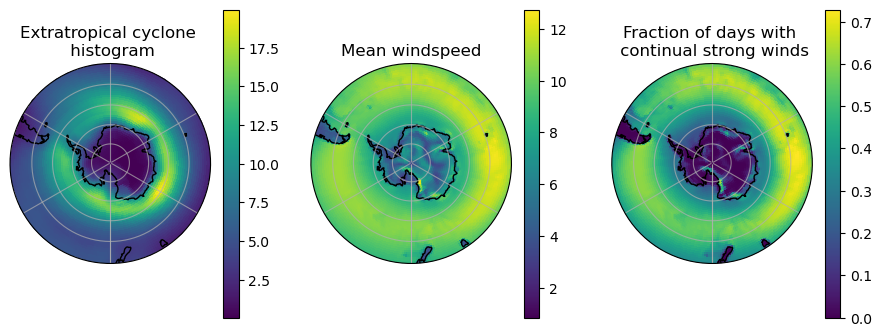

In [75]:
fig, axs = plt.subplots(nrows=1, ncols=3,
                       subplot_kw={'projection': ccrs.SouthPolarStereo()},
                       figsize=(11,4))
axs=axs.flatten()


ds_hist.hist_5deg.plot(ax=axs[0],
                       transform=ccrs.PlateCarree(),
                       cbar_kwargs={'label': ''},
                      )
axs[0].set_title('Extratropical cyclone \n histogram')

wind_ann.plot(ax=axs[1],
              transform=ccrs.PlateCarree(),
              cbar_kwargs={'label': ''},
             )
axs[1].set_title('Mean windspeed')

(1/(4*365*95) * windy_days_ann).plot(ax=axs[2],
                                     transform=ccrs.PlateCarree(),
                                     cbar_kwargs={'label': ''},
                                    )
axs[2].set_title('Fraction of days with \n continual strong winds')

for i in range(3):
    axs[i].set_extent([-180, 180, -90, -40], ccrs.PlateCarree())
    axs[i].gridlines(alpha=0.7)
    axs[i].set_boundary(circle, transform=axs[i].transAxes)
    axs[i].coastlines()
    
plt.savefig('/home/Katherine.Turner/storminess_comp_annual.png', format='png', dpi=100)

## Interannual variability in storm center numbers

In [49]:
year_counts_summer = xr.DataArray(
    data = [4396, 4249, 4211, 4280, 4388, 4311, 4315, 4298, 4511, 3994,
       4198, 4367, 4315, 4209, 4293, 4225, 4263, 4364, 4346, 4333, 4040,
       4369, 4306, 4541, 4520, 4028, 4378, 4166, 4415, 4319, 4563, 4427,
       4555, 4435, 4496, 4363, 4460, 4283, 4043, 4151, 4515, 4118, 4408,
       4420, 4349, 4667, 4153, 4353, 4482, 4145, 4150, 4678, 4479, 4351,
       4215, 4400, 4169, 4337, 4179, 4423, 4228, 3981, 4232, 4020, 4446,
       4406, 4123, 4527, 4635, 4146, 4397, 4126, 4333, 4127, 4176, 4225,
       4275, 4569, 4599, 4437, 3950, 4337, 4155, 4423, 4261, 4011, 4172,
       4218, 4434, 4539, 4380, 4258, 4516, 4518],
    dims = ['time'],
    coords=dict(
        time=djf_windy.time.data
    )
)
year_counts_summer

<xarray.DataArray (time: 94)>
array([4396, 4249, 4211, 4280, 4388, 4311, 4315, 4298, 4511, 3994, 4198,
       4367, 4315, 4209, 4293, 4225, 4263, 4364, 4346, 4333, 4040, 4369,
       4306, 4541, 4520, 4028, 4378, 4166, 4415, 4319, 4563, 4427, 4555,
       4435, 4496, 4363, 4460, 4283, 4043, 4151, 4515, 4118, 4408, 4420,
       4349, 4667, 4153, 4353, 4482, 4145, 4150, 4678, 4479, 4351, 4215,
       4400, 4169, 4337, 4179, 4423, 4228, 3981, 4232, 4020, 4446, 4406,
       4123, 4527, 4635, 4146, 4397, 4126, 4333, 4127, 4176, 4225, 4275,
       4569, 4599, 4437, 3950, 4337, 4155, 4423, 4261, 4011, 4172, 4218,
       4434, 4539, 4380, 4258, 4516, 4518])
Coordinates:
  * time     (time) object 0151-12-01 00:00:00 ... 0244-12-01 00:00:00

In [50]:
wind_SO = (da * djf_windy).sum(dim=['lat', 'lon'])

/nbhome/Katherine.Turner/miniconda3/envs/py310/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


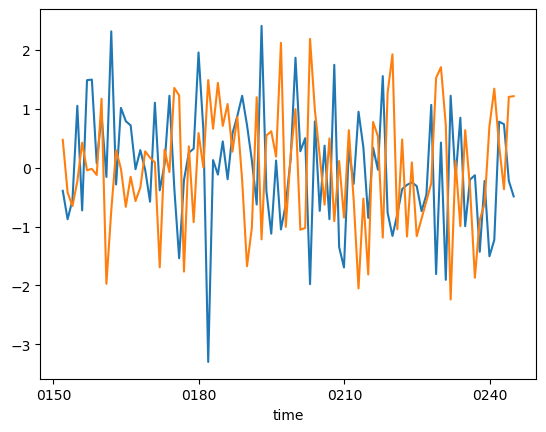

In [53]:
((wind_SO - wind_SO.mean())/wind_SO.std()).plot()
((year_counts_summer - year_counts_summer.mean())/year_counts_summer.std()).plot()

/nbhome/Katherine.Turner/miniconda3/envs/py310/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


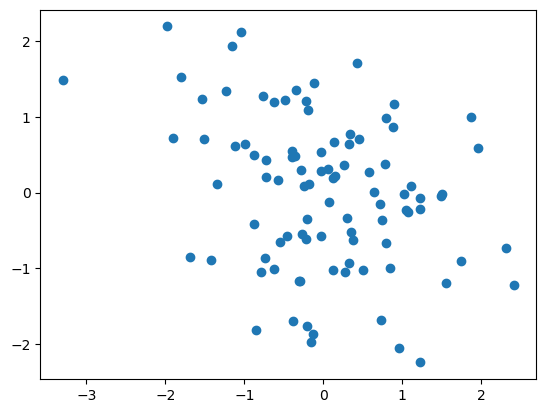

In [56]:
plt.scatter((wind_SO - wind_SO.mean())/wind_SO.std(), 
            (year_counts_summer - year_counts_summer.mean())/year_counts_summer.std())

In [54]:
np.corrcoef(wind_SO, year_counts_summer)

/nbhome/Katherine.Turner/miniconda3/envs/py310/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


array([[ 1.        , -0.31554837],
       [-0.31554837,  1.        ]])